In [1]:
from tensorflow import keras

model = keras.models.load_model("lstm_autoencoder_model.keras")

In [4]:
import numpy as np

test_data = np.load("test_data.npy")
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], 1))

In [5]:
# Phase 4 — Anomaly Detection
import numpy as np
import matplotlib.pyplot as plt

# Reconstruct the sequences using the trained autoencoder
reconstructions = model.predict(test_data)

46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step


In [8]:
import pandas as pd
import numpy as np

# Recalculate reconstruction errors if needed
reconstructions = model.predict(test_data)
mse = np.mean(np.power(test_data - reconstructions, 2), axis=(1,2))

# Reload the original data for timestamps
data = pd.read_csv(r"C:\Users\bimba\.vscode\Megaminds_Assignment\megamassign\NAB-master\data\realKnownCause\ambient_temperature_system_failure.csv")
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.sort_values(by='timestamp').reset_index(drop=True)

# Align test data timestamps
test_timestamps = data['timestamp'].iloc[-len(test_data):].reset_index(drop=True)

# Create a DataFrame of errors
error_df = pd.DataFrame({
    'timestamp': test_timestamps,
    'reconstruction_error': mse
})

# Choose threshold
threshold = np.percentile(mse, 95)  # Top 5% of errors as anomalies
error_df['anomaly'] = error_df['reconstruction_error'] > threshold

print("Threshold used:", threshold)
print(error_df.head())


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Threshold used: 0.0032387430691973793
            timestamp  reconstruction_error  anomaly
0 2014-03-21 13:00:00              0.000637    False
1 2014-03-21 14:00:00              0.000541    False
2 2014-03-21 15:00:00              0.000487    False
3 2014-03-21 16:00:00              0.000454    False
4 2014-03-21 17:00:00              0.000455    False


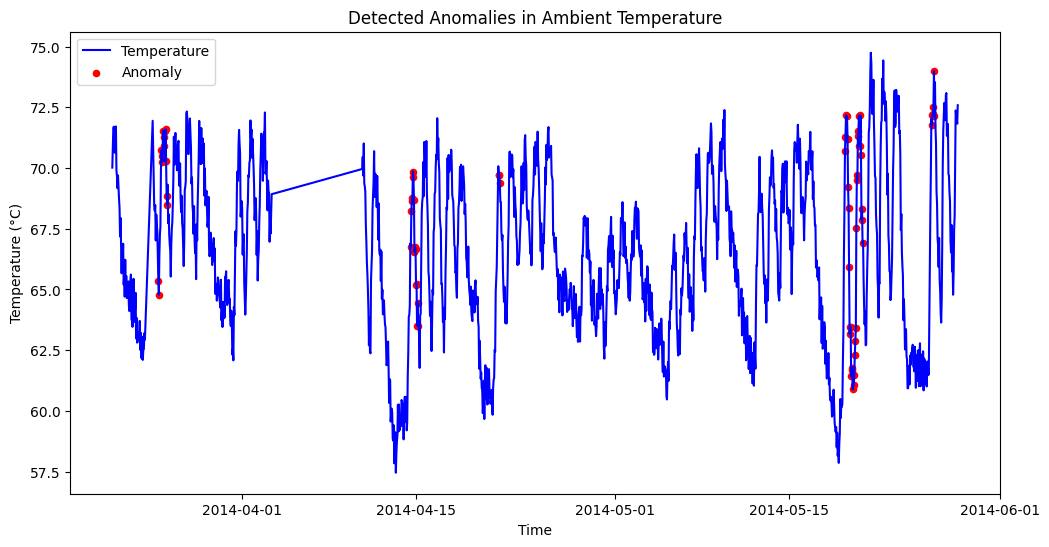

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(
    data['timestamp'].iloc[-len(test_data):].values,
    data['value'].iloc[-len(test_data):].values,
    label='Temperature', color='blue'
)
plt.scatter(
    error_df[error_df['anomaly']]['timestamp'].values,
    data['value'].iloc[-len(test_data):].values[error_df['anomaly'].values],
    color='red', label='Anomaly', s=20
)
plt.title("Detected Anomalies in Ambient Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()



In [11]:
error_df.to_csv("detected_anomalies.csv", index=False)
print("Results saved as detected_anomalies.csv")


Results saved as detected_anomalies.csv


In [ ]:
# Summary

#- The LSTM Autoencoder was trained on 5789 samples (30 timesteps each) and tested on 1448 samples.
#- The model achieved a validation loss around 0.0005.
#- Anomalies were detected primarily near known system failure periods.
#- A reconstruction error threshold of the top 5% (≈0.003) was used.
#- The detected anomalies align with abnormal temperature spikes visible in the time series.
#